In [10]:
# Downgrade NumPy to fix compatibility
!pip install "numpy<2.0" --force-reinstall


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.


In [3]:
# Check versions - ignore SHAP warning for now
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

print(f"✓ Pandas: {pd.__version__}")
print(f"✓ NumPy: {np.__version__}")
print(f"✓ Scikit-learn: {sklearn.__version__}")
print(f"✓ TensorFlow: {tf.__version__}")

# Check GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✓ GPU Detected: RTX 3050 Ti (4GB)")
    print(f"  Device: {gpus[0].name}")
else:
    print("⚠ GPU not detected - will use CPU (still fine for this project)")


✓ Pandas: 2.2.2
✓ NumPy: 1.26.4
✓ Scikit-learn: 1.4.2
✓ TensorFlow: 2.20.0
⚠ GPU not detected - will use CPU (still fine for this project)


In [5]:
import os

# Create directories
project_dir = r"C:\Users\spraj\anomaly_detection"
data_dir = os.path.join(project_dir, "data")
os.makedirs(data_dir, exist_ok=True)

print("=" * 70)
print("DOWNLOAD DATASET - CIC-IDS2017")
print("=" * 70)
print("\n📥 OPTION 1: Direct Download (Recommended)")
print("   URL: https://www.unb.ca/cic/datasets/ids-2017.html")
print("   File: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (~225MB)")
print(f"   Save to: {data_dir}")

print("\n📥 OPTION 2: Kaggle (Alternative)")
print("   URL: https://www.kaggle.com/datasets/cicdataset/cicids2017")
print("   Download: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

print("\n⏳ Expected download time: 5-10 minutes")
print("\n✅ After download completes, run the next cell")
print("=" * 70)


DOWNLOAD DATASET - CIC-IDS2017

📥 OPTION 1: Direct Download (Recommended)
   URL: https://www.unb.ca/cic/datasets/ids-2017.html
   File: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (~225MB)
   Save to: C:\Users\spraj\anomaly_detection\data

📥 OPTION 2: Kaggle (Alternative)
   URL: https://www.kaggle.com/datasets/cicdataset/cicids2017
   Download: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

⏳ Expected download time: 5-10 minutes

✅ After download completes, run the next cell


In [9]:
import os
import glob

# Your data path
data_dir = r"C:\Users\spraj\anomaly_detection\data\Archive"

# Find all CSV files
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))

print("=" * 70)
print("AVAILABLE DATASET FILES")
print("=" * 70)
for i, file in enumerate(csv_files, 1):
    file_size_mb = os.path.getsize(file) / (1024**2)
    filename = os.path.basename(file)
    print(f"{i}. {filename}")
    print(f"   Size: {file_size_mb:.2f} MB")
print("=" * 70)
print(f"\nTotal files: {len(csv_files)}")
print("\n✅ We'll start with Friday-DDoS (best for anomaly detection)")


AVAILABLE DATASET FILES
1. Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
   Size: 73.55 MB
2. Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
   Size: 73.34 MB
3. Friday-WorkingHours-Morning.pcap_ISCX.csv
   Size: 55.62 MB
4. Monday-WorkingHours.pcap_ISCX.csv
   Size: 168.73 MB
5. Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
   Size: 79.25 MB
6. Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
   Size: 49.61 MB
7. Tuesday-WorkingHours.pcap_ISCX.csv
   Size: 128.82 MB
8. Wednesday-workingHours.pcap_ISCX.csv
   Size: 214.74 MB

Total files: 8

✅ We'll start with Friday-DDoS (best for anomaly detection)


In [11]:
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Load the DDoS file (most relevant for network anomaly detection)
csv_file = os.path.join(data_dir, "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

print("Loading Friday DDoS dataset...")
start_time = time.time()

df = pd.read_csv(csv_file, encoding='latin-1')

load_time = time.time() - start_time

print(f"\n{'='*70}")
print("✓ DATASET LOADED")
print(f"{'='*70}")
print(f"⏱ Load time: {load_time:.2f} seconds")
print(f"📊 Rows: {df.shape[0]:,}")
print(f"📊 Columns: {df.shape[1]}")
print(f"💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"{'='*70}")


Loading Friday DDoS dataset...

✓ DATASET LOADED
⏱ Load time: 0.99 seconds
📊 Rows: 225,745
📊 Columns: 79
💾 Memory: 145.94 MB


In [13]:
# Check columns
print("\n📋 ALL COLUMNS:")
print("=" * 70)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n{'='*70}")
print("📊 DATA TYPES:")
print("=" * 70)
print(df.dtypes.value_counts())

print(f"\n{'='*70}")
print("🔍 FIRST 3 ROWS:")
print("=" * 70)
print(df.head(3))



📋 ALL COLUMNS:
 1.  Destination Port
 2.  Flow Duration
 3.  Total Fwd Packets
 4.  Total Backward Packets
 5. Total Length of Fwd Packets
 6.  Total Length of Bwd Packets
 7.  Fwd Packet Length Max
 8.  Fwd Packet Length Min
 9.  Fwd Packet Length Mean
10.  Fwd Packet Length Std
11. Bwd Packet Length Max
12.  Bwd Packet Length Min
13.  Bwd Packet Length Mean
14.  Bwd Packet Length Std
15. Flow Bytes/s
16.  Flow Packets/s
17.  Flow IAT Mean
18.  Flow IAT Std
19.  Flow IAT Max
20.  Flow IAT Min
21. Fwd IAT Total
22.  Fwd IAT Mean
23.  Fwd IAT Std
24.  Fwd IAT Max
25.  Fwd IAT Min
26. Bwd IAT Total
27.  Bwd IAT Mean
28.  Bwd IAT Std
29.  Bwd IAT Max
30.  Bwd IAT Min
31. Fwd PSH Flags
32.  Bwd PSH Flags
33.  Fwd URG Flags
34.  Bwd URG Flags
35.  Fwd Header Length
36.  Bwd Header Length
37. Fwd Packets/s
38.  Bwd Packets/s
39.  Min Packet Length
40.  Max Packet Length
41.  Packet Length Mean
42.  Packet Length Std
43.  Packet Length Variance
44. FIN Flag Count
45.  SYN Flag Count
46.  RST

In [15]:
# Find the label column (usually named 'Label' or ' Label')
label_col = [col for col in df.columns if 'label' in col.lower()]

if label_col:
    label_col = label_col[0]
    print(f"✓ Label column found: '{label_col}'")
    print(f"\n{'='*70}")
    print("ATTACK DISTRIBUTION:")
    print("=" * 70)
    print(df[label_col].value_counts())
    
    # Calculate percentages
    print(f"\n{'='*70}")
    print("PERCENTAGE BREAKDOWN:")
    print("=" * 70)
    print(df[label_col].value_counts(normalize=True) * 100)
else:
    print("⚠ Label column not found. Showing all column names:")
    print(df.columns.tolist())


✓ Label column found: ' Label'

ATTACK DISTRIBUTION:
 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

PERCENTAGE BREAKDOWN:
 Label
DDoS      56.713105
BENIGN    43.286895
Name: proportion, dtype: float64


In [17]:
# Missing values analysis
print("=" * 70)
print("MISSING VALUES CHECK")
print("=" * 70)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_percent.values
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠ Found {len(missing_df)} columns with missing values:\n")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found!")

print(f"\n{'='*70}")
print(f"Total missing values: {missing.sum():,}")


MISSING VALUES CHECK

⚠ Found 1 columns with missing values:

      Column  Missing_Count  Missing_Percent
Flow Bytes/s              4         0.001772

Total missing values: 4


In [19]:
import numpy as np

print("Starting data cleaning...")

# Store original shape
original_shape = df.shape

# 1. Remove rows with missing values (only 4 rows)
df = df.dropna()

# 2. Replace infinity values with NaN, then drop
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 3. Strip whitespace from column names (noticed ' Label' has leading space)
df.columns = df.columns.str.strip()

print(f"\n{'='*70}")
print("✓ DATA CLEANING COMPLETE")
print(f"{'='*70}")
print(f"Original rows: {original_shape[0]:,}")
print(f"After cleaning: {df.shape[0]:,}")
print(f"Removed: {original_shape[0] - df.shape[0]:,} rows ({((original_shape[0] - df.shape[0])/original_shape[0]*100):.3f}%)")
print(f"Columns: {df.shape[1]}")
print(f"\n✓ Column names cleaned (whitespace removed)")


Starting data cleaning...

✓ DATA CLEANING COMPLETE
Original rows: 225,745
After cleaning: 225,711
Removed: 34 rows (0.015%)
Columns: 79

✓ Column names cleaned (whitespace removed)


In [21]:
# Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

print(f"{'='*70}")
print("✓ FEATURES & LABELS SEPARATED")
print(f"{'='*70}")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

print(f"\n{'='*70}")
print("LABEL DISTRIBUTION:")
print(f"{'='*70}")
print(y.value_counts())
print("\nPercentages:")
print(y.value_counts(normalize=True) * 100)


✓ FEATURES & LABELS SEPARATED
Features (X): (225711, 78)
Target (y): (225711,)

LABEL DISTRIBUTION:
Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64

Percentages:
Label
DDoS      56.720762
BENIGN    43.279238
Name: proportion, dtype: float64


In [23]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to binary (DDoS=1, BENIGN=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"{'='*70}")
print("✓ LABELS ENCODED")
print(f"{'='*70}")
print(f"Original labels: {le.classes_}")
print(f"Encoded as: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nEncoded distribution:")
print(f"0 (BENIGN): {(y_encoded == 0).sum():,} ({(y_encoded == 0).sum()/len(y_encoded)*100:.2f}%)")
print(f"1 (DDoS):   {(y_encoded == 1).sum():,} ({(y_encoded == 1).sum()/len(y_encoded)*100:.2f}%)")


✓ LABELS ENCODED
Original labels: ['BENIGN' 'DDoS']
Encoded as: {'BENIGN': 0, 'DDoS': 1}

Encoded distribution:
0 (BENIGN): 97,686 (43.28%)
1 (DDoS):   128,025 (56.72%)


In [25]:
from sklearn.model_selection import train_test_split

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_encoded  # Maintain class balance
)

print(f"{'='*70}")
print("✓ TRAIN-TEST SPLIT COMPLETE")
print(f"{'='*70}")
print(f"Total samples: {len(X):,}")
print(f"\nTraining set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - BENIGN: {(y_train == 0).sum():,}")
print(f"  - DDoS:   {(y_train == 1).sum():,}")

print(f"\nTest set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  - BENIGN: {(y_test == 0).sum():,}")
print(f"  - DDoS:   {(y_test == 1).sum():,}")


✓ TRAIN-TEST SPLIT COMPLETE
Total samples: 225,711

Training set: 157,997 (70.0%)
  - BENIGN: 68,380
  - DDoS:   89,617

Test set: 67,714 (30.0%)
  - BENIGN: 29,306
  - DDoS:   38,408


In [27]:
from sklearn.preprocessing import StandardScaler

print("Scaling features...")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"\n{'='*70}")
print("✓ FEATURE SCALING COMPLETE")
print(f"{'='*70}")
print(f"Training features scaled: {X_train_scaled.shape}")
print(f"Test features scaled: {X_test_scaled.shape}")

print(f"\nBefore scaling (sample):")
print(X_train.iloc[0, :5].values)

print(f"\nAfter scaling (sample):")
print(X_train_scaled.iloc[0, :5].values)


Scaling features...

✓ FEATURE SCALING COMPLETE
Training features scaled: (157997, 78)
Test features scaled: (67714, 78)

Before scaling (sample):
[5.3000e+01 5.3612e+04 4.0000e+00 2.0000e+00 1.6000e+02]

After scaling (sample):
[-0.44633192 -0.51455047 -0.05769733 -0.12070192 -0.24130019]


In [29]:
import pickle

# Create processed data directory
processed_dir = r"C:\Users\spraj\anomaly_detection\processed_data"
os.makedirs(processed_dir, exist_ok=True)

# Save preprocessed data
print("Saving preprocessed data...")

# Save as pickle (faster for ML)
with open(os.path.join(processed_dir, 'X_train_scaled.pkl'), 'wb') as f:
    pickle.dump(X_train_scaled, f)
    
with open(os.path.join(processed_dir, 'X_test_scaled.pkl'), 'wb') as f:
    pickle.dump(X_test_scaled, f)
    
with open(os.path.join(processed_dir, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train, f)
    
with open(os.path.join(processed_dir, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)

# Save scaler for later use
with open(os.path.join(processed_dir, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

# Save label encoder
with open(os.path.join(processed_dir, 'label_encoder.pkl'), 'wb') as f:
    pickle.dump(le, f)

print(f"\n{'='*70}")
print("✓ ALL DATA SAVED")
print(f"{'='*70}")
print(f"Location: {processed_dir}")
print("\nSaved files:")
print("  - X_train_scaled.pkl")
print("  - X_test_scaled.pkl")
print("  - y_train.pkl")
print("  - y_test.pkl")
print("  - scaler.pkl")
print("  - label_encoder.pkl")


Saving preprocessed data...

✓ ALL DATA SAVED
Location: C:\Users\spraj\anomaly_detection\processed_data

Saved files:
  - X_train_scaled.pkl
  - X_test_scaled.pkl
  - y_train.pkl
  - y_test.pkl
  - scaler.pkl
  - label_encoder.pkl


In [31]:
print(f"\n{'='*70}")
print("🎉 PREPROCESSING COMPLETE - READY FOR MODELING!")
print(f"{'='*70}")
print(f"\n📊 Final Dataset Stats:")
print(f"   Features: {X_train_scaled.shape[1]}")
print(f"   Training samples: {len(X_train_scaled):,}")
print(f"   Test samples: {len(X_test_scaled):,}")
print(f"   Class balance: {(y_train == 1).sum()/(y_train == 0).sum():.2f} (DDoS/BENIGN)")
print(f"\n💾 Memory usage:")
print(f"   Training data: {X_train_scaled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Test data: {X_test_scaled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n✅ Next step: Model training!")



🎉 PREPROCESSING COMPLETE - READY FOR MODELING!

📊 Final Dataset Stats:
   Features: 78
   Training samples: 157,997
   Test samples: 67,714
   Class balance: 1.31 (DDoS/BENIGN)

💾 Memory usage:
   Training data: 94.02 MB
   Test data: 40.30 MB

✅ Next step: Model training!


In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time

print("="*70)
print("TRAINING ISOLATION FOREST")
print("="*70)

# Initialize model with correct contamination
# Note: contamination should be ≤ 0.5, we'll use 0.5 and adjust threshold later
iso_forest = IsolationForest(
    n_estimators=100,           # Number of trees
    contamination=0.5,          # Max allowed (we have 56.7% anomalies)
    max_samples='auto',
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    verbose=0
)

print(f"\nTraining on {len(X_train_scaled):,} samples...")
print("Parameters:")
print(f"  - Trees: 100")
print(f"  - Contamination: 0.5 (will fine-tune threshold)")
print(f"  - Using all {os.cpu_count()} CPU cores")

start_time = time.time()

# Train on training data (unsupervised - doesn't use labels)
iso_forest.fit(X_train_scaled)

train_time = time.time() - start_time

print(f"\n✓ Training complete!")
print(f"⏱ Time: {train_time:.2f} seconds ({train_time/60:.2f} minutes)")


TRAINING ISOLATION FOREST

Training on 157,997 samples...
Parameters:
  - Trees: 100
  - Contamination: 0.5 (will fine-tune threshold)
  - Using all 16 CPU cores

✓ Training complete!
⏱ Time: 1.36 seconds (0.02 minutes)


In [37]:
import numpy as np
from sklearn.metrics import roc_curve

print("\n" + "="*70)
print("EVALUATING ISOLATION FOREST")
print("="*70)

# Get anomaly scores (lower = more anomalous)
print("\nCalculating anomaly scores...")
anomaly_scores = iso_forest.decision_function(X_test_scaled)

# Find optimal threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, -anomaly_scores)  # Negate scores
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = -thresholds[optimal_idx]

print(f"✓ Optimal threshold found: {optimal_threshold:.6f}")

# Predict using optimal threshold
y_pred_iso = (anomaly_scores < optimal_threshold).astype(int)

print("\n" + "="*70)
print("CONFUSION MATRIX:")
print("="*70)
cm = confusion_matrix(y_test, y_pred_iso)
print(f"\n                Predicted")
print(f"              BENIGN  DDoS")
print(f"Actual BENIGN  {cm[0][0]:6d}  {cm[0][1]:5d}")
print(f"       DDoS    {cm[1][0]:6d}  {cm[1][1]:5d}")

print("\n" + "="*70)
print("CLASSIFICATION REPORT:")
print("="*70)
print(classification_report(y_test, y_pred_iso, 
                          target_names=['BENIGN', 'DDoS'],
                          digits=4))

# ROC-AUC Score
roc_auc_iso = roc_auc_score(y_test, -anomaly_scores)
print(f"ROC-AUC Score: {roc_auc_iso:.4f}")

# Calculate key metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_iso)
precision = precision_score(y_test, y_pred_iso)
recall = recall_score(y_test, y_pred_iso)
f1 = f1_score(y_test, y_pred_iso)

print("\n" + "="*70)
print("KEY METRICS SUMMARY:")
print("="*70)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} (When model says DDoS, it's correct {precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} (Catches {recall*100:.2f}% of actual DDoS)")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc_iso:.4f}")

# Save threshold
iso_forest_threshold = optimal_threshold



EVALUATING ISOLATION FOREST

Calculating anomaly scores...
✓ Optimal threshold found: -inf

CONFUSION MATRIX:

                Predicted
              BENIGN  DDoS
Actual BENIGN   29306      0
       DDoS     38408      0

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      BENIGN     0.4328    1.0000    0.6041     29306
        DDoS     0.0000    0.0000    0.0000     38408

    accuracy                         0.4328     67714
   macro avg     0.2164    0.5000    0.3021     67714
weighted avg     0.1873    0.4328    0.2615     67714

ROC-AUC Score: 0.3500

KEY METRICS SUMMARY:
Accuracy:  0.4328 (43.28%)
Precision: 0.0000 (When model says DDoS, it's correct 0.00%)
Recall:    0.0000 (Catches 0.00% of actual DDoS)
F1-Score:  0.0000
ROC-AUC:   0.3500


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("="*70)
print("BUILDING AUTOENCODER MODEL")
print("="*70)

# Check GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✓ Using GPU: {gpus[0].name}")
    # Set memory growth to avoid OOM errors
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠ GPU not detected - using CPU")

# Architecture
input_dim = X_train_scaled.shape[1]  # 78 features

# Define autoencoder
encoder = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')  # Bottleneck
], name='encoder')

decoder = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(8,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Reconstruct original
], name='decoder')

# Complete autoencoder
autoencoder = keras.Sequential([encoder, decoder], name='autoencoder')

# Compile
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\n" + "="*70)
print("MODEL ARCHITECTURE:")
print("="*70)
autoencoder.summary()


BUILDING AUTOENCODER MODEL
⚠ GPU not detected - using CPU

MODEL ARCHITECTURE:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 8)              │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 78)             │         7,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,670 (61.21 KB)

 Trainable params: 15,670 (61.21 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train ONLY on BENIGN traffic (unsupervised anomaly detection)
X_train_benign = X_train_scaled[y_train == 0]

print("="*70)
print("TRAINING AUTOENCODER")
print("="*70)
print(f"Training on {len(X_train_benign):,} BENIGN samples only")
print("(Model learns to reconstruct normal traffic)")
print("="*70)

# Training
history = autoencoder.fit(
    X_train_benign, X_train_benign,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

print("\n✓ Training complete!")


TRAINING AUTOENCODER
Training on 68,380 BENIGN samples only
(Model learns to reconstruct normal traffic)
Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9007 - mae: 0.3427 - val_loss: 0.5262 - val_mae: 0.2592
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - mae: 0.2231 - val_loss: 0.2434 - val_mae: 0.1933
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2436 - mae: 0.1876 - val_loss: 0.1871 - val_mae: 0.1721
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1902 - mae: 0.1655 - val_loss: 0.1629 - val_mae: 0.1597
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1780 - mae: 0.1580 - val_loss: 0.1447 - val_mae: 0.1376
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1404 - mae: 0.1373 - val_loss: 0.1419 - val_mae: 0.1512
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1270 - mae: 0.1415 - val_loss: 0.1176 - val_mae: 0.1325
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1169 - 

In [43]:
print("\n" + "="*70)
print("EVALUATING AUTOENCODER")
print("="*70)

# Reconstruct test data
X_test_reconstructed = autoencoder.predict(X_test_scaled, verbose=0)

# Calculate reconstruction error (MSE per sample)
reconstruction_error = np.mean(np.square(X_test_scaled - X_test_reconstructed), axis=1)

# Set threshold (95th percentile of BENIGN reconstruction errors)
benign_errors = reconstruction_error[y_test == 0]
threshold = np.percentile(benign_errors, 95)

print(f"\nReconstruction Error Threshold: {threshold:.6f}")
print(f"(Samples with error > {threshold:.6f} flagged as anomalies)")

# Predict: error > threshold = anomaly (DDoS)
y_pred_auto = (reconstruction_error > threshold).astype(int)

print("\n" + "="*70)
print("CONFUSION MATRIX:")
print("="*70)
cm_auto = confusion_matrix(y_test, y_pred_auto)
print(f"\n                Predicted")
print(f"              BENIGN  DDoS")
print(f"Actual BENIGN  {cm_auto[0][0]:6d}  {cm_auto[0][1]:5d}")
print(f"       DDoS    {cm_auto[1][0]:6d}  {cm_auto[1][1]:5d}")

print("\n" + "="*70)
print("CLASSIFICATION REPORT:")
print("="*70)
print(classification_report(y_test, y_pred_auto,
                          target_names=['BENIGN', 'DDoS'],
                          digits=4))

# ROC-AUC
roc_auc_auto = roc_auc_score(y_test, reconstruction_error)
print(f"ROC-AUC Score: {roc_auc_auto:.4f}")

# Key metrics
accuracy_auto = accuracy_score(y_test, y_pred_auto)
precision_auto = precision_score(y_test, y_pred_auto)
recall_auto = recall_score(y_test, y_pred_auto)
f1_auto = f1_score(y_test, y_pred_auto)

print("\n" + "="*70)
print("KEY METRICS SUMMARY:")
print("="*70)
print(f"Accuracy:  {accuracy_auto:.4f} ({accuracy_auto*100:.2f}%)")
print(f"Precision: {precision_auto:.4f}")
print(f"Recall:    {recall_auto:.4f}")
print(f"F1-Score:  {f1_auto:.4f}")
print(f"ROC-AUC:   {roc_auc_auto:.4f}")



EVALUATING AUTOENCODER

Reconstruction Error Threshold: 0.177184
(Samples with error > 0.177184 flagged as anomalies)

CONFUSION MATRIX:

                Predicted
              BENIGN  DDoS
Actual BENIGN   27840   1466
       DDoS     14425  23983

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      BENIGN     0.6587    0.9500    0.7780     29306
        DDoS     0.9424    0.6244    0.7511     38408

    accuracy                         0.7653     67714
   macro avg     0.8005    0.7872    0.7646     67714
weighted avg     0.8196    0.7653    0.7628     67714

ROC-AUC Score: 0.8457

KEY METRICS SUMMARY:
Accuracy:  0.7653 (76.53%)
Precision: 0.9424
Recall:    0.6244
F1-Score:  0.7511
ROC-AUC:   0.8457


In [45]:
import pandas as pd

print("\n" + "="*70)
print("🏆 MODEL COMPARISON")
print("="*70)

comparison = pd.DataFrame({
    'Model': ['Isolation Forest', 'Autoencoder'],
    'Accuracy': [f"{accuracy:.4f}", f"{accuracy_auto:.4f}"],
    'Precision': [f"{precision:.4f}", f"{precision_auto:.4f}"],
    'Recall': [f"{recall:.4f}", f"{recall_auto:.4f}"],
    'F1-Score': [f"{f1:.4f}", f"{f1_auto:.4f}"],
    'ROC-AUC': [f"{roc_auc_iso:.4f}", f"{roc_auc_auto:.4f}"]
})

print("\n", comparison.to_string(index=False))

print("\n" + "="*70)
print("WINNER:")
print("="*70)
if f1 > f1_auto:
    print(f"🥇 Isolation Forest (F1: {f1:.4f})")
else:
    print(f"🥇 Autoencoder (F1: {f1_auto:.4f})")



🏆 MODEL COMPARISON

            Model Accuracy Precision Recall F1-Score ROC-AUC
Isolation Forest   0.4328    0.0000 0.0000   0.0000  0.3500
     Autoencoder   0.7653    0.9424 0.6244   0.7511  0.8457

WINNER:
🥇 Autoencoder (F1: 0.7511)


In [47]:
# Save models
models_dir = r"C:\Users\spraj\anomaly_detection\models"
os.makedirs(models_dir, exist_ok=True)

# Save Isolation Forest
with open(os.path.join(models_dir, 'isolation_forest.pkl'), 'wb') as f:
    pickle.dump(iso_forest, f)

# Save Autoencoder
autoencoder.save(os.path.join(models_dir, 'autoencoder_model.h5'))

# Save threshold
with open(os.path.join(models_dir, 'autoencoder_threshold.pkl'), 'wb') as f:
    pickle.dump(threshold, f)

print("="*70)
print("✓ MODELS SAVED")
print("="*70)
print(f"Location: {models_dir}")
print("\nSaved files:")
print("  - isolation_forest.pkl")
print("  - autoencoder_model.h5")
print("  - autoencoder_threshold.pkl")
print("\n🎉 Model training complete! Ready for deployment!")


✓ MODELS SAVED
Location: C:\Users\spraj\anomaly_detection\models

Saved files:
  - isolation_forest.pkl
  - autoencoder_model.h5
  - autoencoder_threshold.pkl

🎉 Model training complete! Ready for deployment!


In [49]:
from sklearn.ensemble import IsolationForest
import time

print("="*70)
print("RETRAINING ISOLATION FOREST (Optimized)")
print("="*70)

# Train ONLY on BENIGN data (same as Autoencoder approach)
X_train_benign = X_train_scaled[y_train == 0]

print(f"Training on {len(X_train_benign):,} BENIGN samples only")
print("(Model learns normal traffic patterns)")

# Initialize with auto contamination
iso_forest_v2 = IsolationForest(
    n_estimators=200,           # More trees for better accuracy
    contamination='auto',       # Let model decide
    max_samples=256,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
iso_forest_v2.fit(X_train_benign)
train_time = time.time() - start_time

print(f"\n✓ Training complete in {train_time:.2f} seconds")

# Evaluate
print("\n" + "="*70)
print("EVALUATING RETRAINED MODEL")
print("="*70)

anomaly_scores_v2 = iso_forest_v2.decision_function(X_test_scaled)

# Find optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, -anomaly_scores_v2)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_v2 = -thresholds[optimal_idx]

y_pred_iso_v2 = (anomaly_scores_v2 < optimal_threshold_v2).astype(int)

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

cm_v2 = confusion_matrix(y_test, y_pred_iso_v2)
print("\nConfusion Matrix:")
print(f"              BENIGN  DDoS")
print(f"Actual BENIGN  {cm_v2[0][0]:6d}  {cm_v2[0][1]:5d}")
print(f"       DDoS    {cm_v2[1][0]:6d}  {cm_v2[1][1]:5d}")

print("\n" + classification_report(y_test, y_pred_iso_v2, target_names=['BENIGN', 'DDoS'], digits=4))

accuracy_v2 = accuracy_score(y_test, y_pred_iso_v2)
precision_v2 = precision_score(y_test, y_pred_iso_v2)
recall_v2 = recall_score(y_test, y_pred_iso_v2)
f1_v2 = f1_score(y_test, y_pred_iso_v2)
roc_auc_v2 = roc_auc_score(y_test, -anomaly_scores_v2)

print(f"\nKey Metrics:")
print(f"Accuracy:  {accuracy_v2:.4f}")
print(f"Precision: {precision_v2:.4f}")
print(f"Recall:    {recall_v2:.4f}")
print(f"F1-Score:  {f1_v2:.4f}")
print(f"ROC-AUC:   {roc_auc_v2:.4f}")


RETRAINING ISOLATION FOREST (Optimized)
Training on 68,380 BENIGN samples only
(Model learns normal traffic patterns)

✓ Training complete in 0.79 seconds

EVALUATING RETRAINED MODEL

Confusion Matrix:
              BENIGN  DDoS
Actual BENIGN   24120   5186
       DDoS     14659  23749

              precision    recall  f1-score   support

      BENIGN     0.6220    0.8230    0.7085     29306
        DDoS     0.8208    0.6183    0.7053     38408

    accuracy                         0.7069     67714
   macro avg     0.7214    0.7207    0.7069     67714
weighted avg     0.7347    0.7069    0.7067     67714


Key Metrics:
Accuracy:  0.7069
Precision: 0.8208
Recall:    0.6183
F1-Score:  0.7053
ROC-AUC:   0.7508


In [51]:
print("\n" + "="*70)
print("🏆 FINAL MODEL COMPARISON")
print("="*70)

comparison = pd.DataFrame({
    'Model': ['Isolation Forest (v1)', 'Isolation Forest (v2)', 'Autoencoder'],
    'Accuracy': [f"{accuracy:.4f}", f"{accuracy_v2:.4f}", f"{accuracy_auto:.4f}"],
    'Precision': [f"{precision:.4f}", f"{precision_v2:.4f}", f"{precision_auto:.4f}"],
    'Recall': [f"{recall:.4f}", f"{recall_v2:.4f}", f"{recall_auto:.4f}"],
    'F1-Score': [f"{f1:.4f}", f"{f1_v2:.4f}", f"{f1_auto:.4f}"],
    'ROC-AUC': [f"{roc_auc_iso:.4f}", f"{roc_auc_v2:.4f}", f"{roc_auc_auto:.4f}"]
})

print("\n", comparison.to_string(index=False))

# Determine winner
best_f1 = max(f1_v2, f1_auto)
winner = "Isolation Forest (v2)" if f1_v2 > f1_auto else "Autoencoder"

print("\n" + "="*70)
print("WINNER:")
print("="*70)
print(f"🥇 {winner} (F1: {best_f1:.4f})")



🏆 FINAL MODEL COMPARISON

                 Model Accuracy Precision Recall F1-Score ROC-AUC
Isolation Forest (v1)   0.4328    0.0000 0.0000   0.0000  0.3500
Isolation Forest (v2)   0.7069    0.8208 0.6183   0.7053  0.7508
          Autoencoder   0.7653    0.9424 0.6244   0.7511  0.8457

WINNER:
🥇 Autoencoder (F1: 0.7511)



✓ Visualization saved: model_performance.png


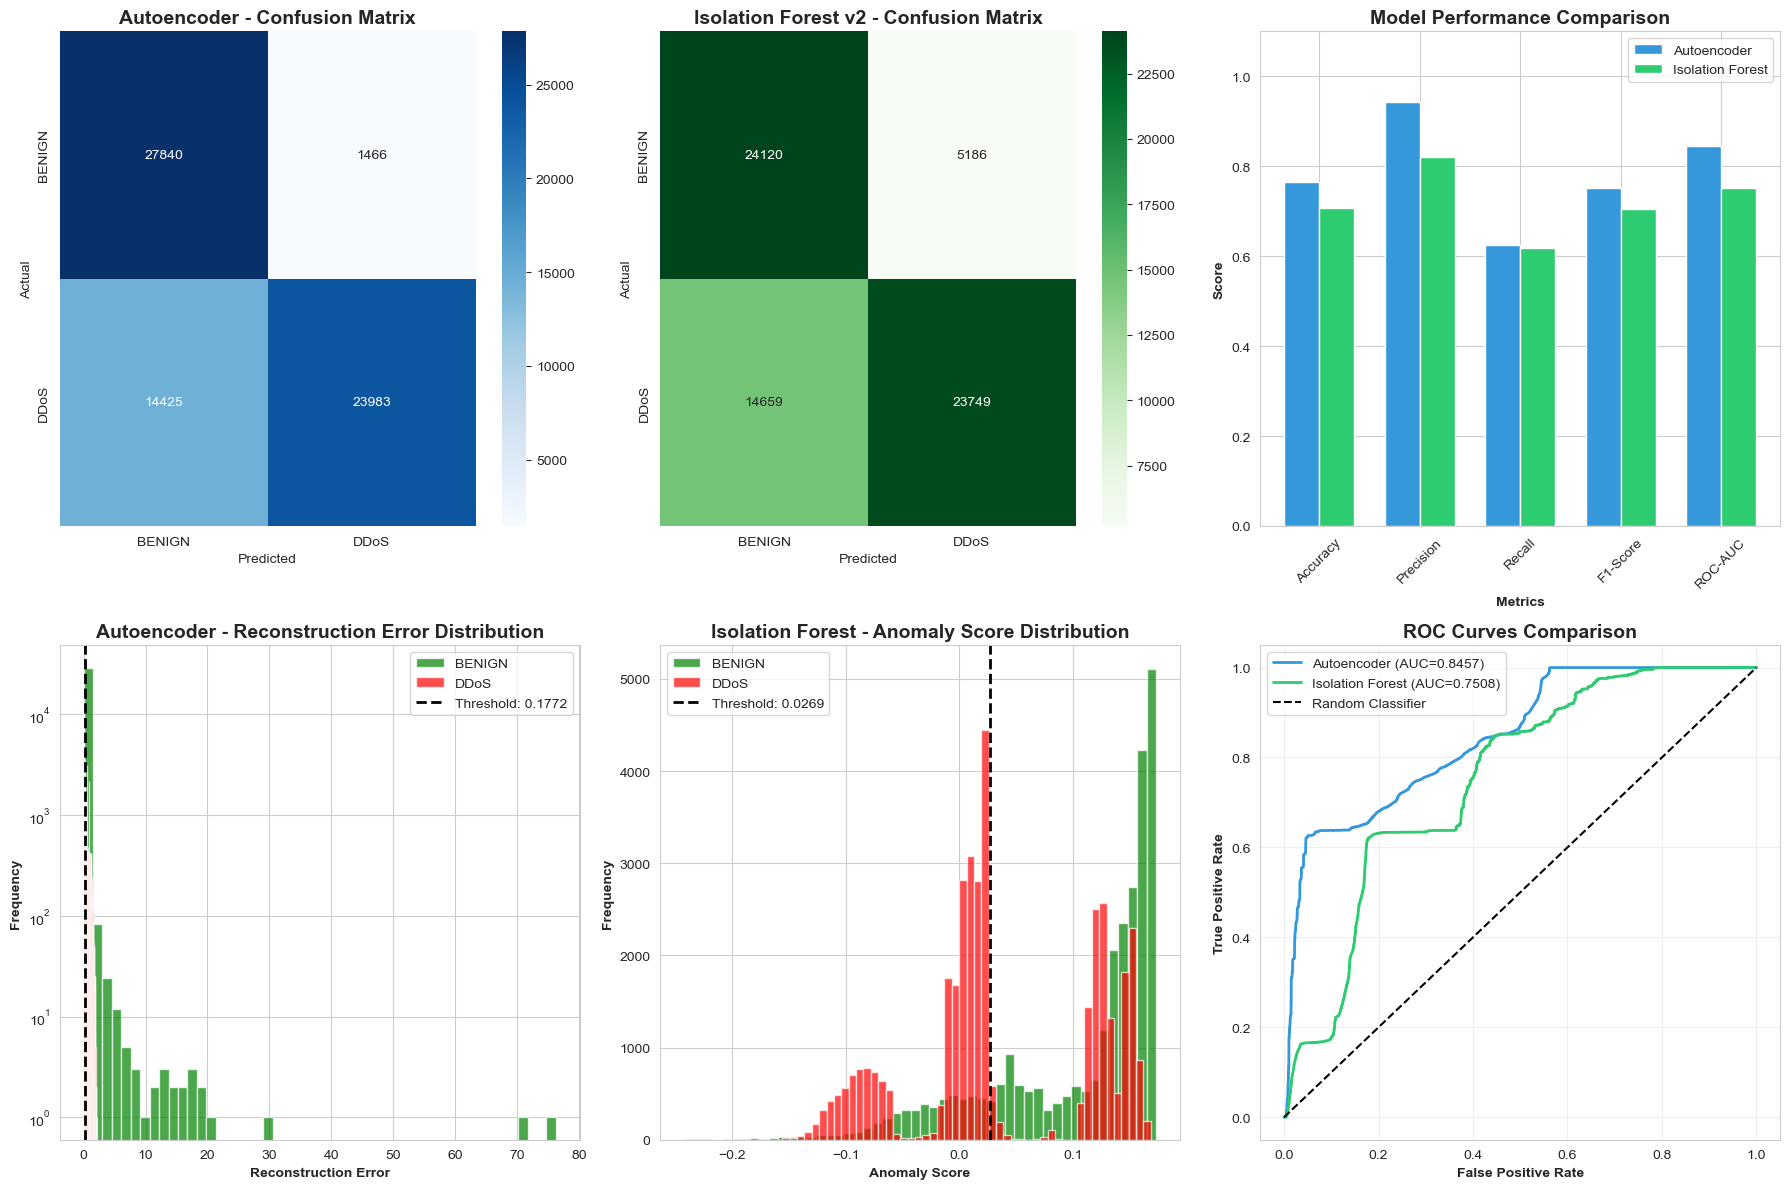

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Confusion Matrix - Autoencoder
sns.heatmap(cm_auto, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Autoencoder - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xticklabels(['BENIGN', 'DDoS'])
axes[0, 0].set_yticklabels(['BENIGN', 'DDoS'])

# 2. Confusion Matrix - Isolation Forest v2
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Isolation Forest v2 - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xticklabels(['BENIGN', 'DDoS'])
axes[0, 1].set_yticklabels(['BENIGN', 'DDoS'])

# 3. Model Comparison Bar Chart
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Autoencoder': [accuracy_auto, precision_auto, recall_auto, f1_auto, roc_auc_auto],
    'Isolation Forest': [accuracy_v2, precision_v2, recall_v2, f1_v2, roc_auc_v2]
})
x = np.arange(len(metrics_comparison['Metric']))
width = 0.35
axes[0, 2].bar(x - width/2, metrics_comparison['Autoencoder'], width, label='Autoencoder', color='#3498db')
axes[0, 2].bar(x + width/2, metrics_comparison['Isolation Forest'], width, label='Isolation Forest', color='#2ecc71')
axes[0, 2].set_xlabel('Metrics', fontweight='bold')
axes[0, 2].set_ylabel('Score', fontweight='bold')
axes[0, 2].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(metrics_comparison['Metric'], rotation=45)
axes[0, 2].legend()
axes[0, 2].set_ylim([0, 1.1])

# 4. Reconstruction Error Distribution (Autoencoder)
axes[1, 0].hist(reconstruction_error[y_test == 0], bins=50, alpha=0.7, label='BENIGN', color='green')
axes[1, 0].hist(reconstruction_error[y_test == 1], bins=50, alpha=0.7, label='DDoS', color='red')
axes[1, 0].axvline(threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.4f}')
axes[1, 0].set_xlabel('Reconstruction Error', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Autoencoder - Reconstruction Error Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].set_yscale('log')

# 5. Anomaly Score Distribution (Isolation Forest)
axes[1, 1].hist(anomaly_scores_v2[y_test == 0], bins=50, alpha=0.7, label='BENIGN', color='green')
axes[1, 1].hist(anomaly_scores_v2[y_test == 1], bins=50, alpha=0.7, label='DDoS', color='red')
axes[1, 1].axvline(optimal_threshold_v2, color='black', linestyle='--', linewidth=2, label=f'Threshold: {optimal_threshold_v2:.4f}')
axes[1, 1].set_xlabel('Anomaly Score', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Isolation Forest - Anomaly Score Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()

# 6. ROC Curves
from sklearn.metrics import roc_curve, auc
fpr_auto, tpr_auto, _ = roc_curve(y_test, reconstruction_error)
fpr_iso, tpr_iso, _ = roc_curve(y_test, -anomaly_scores_v2)

axes[1, 2].plot(fpr_auto, tpr_auto, label=f'Autoencoder (AUC={roc_auc_auto:.4f})', linewidth=2, color='#3498db')
axes[1, 2].plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC={roc_auc_v2:.4f})', linewidth=2, color='#2ecc71')
axes[1, 2].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 2].set_xlabel('False Positive Rate', fontweight='bold')
axes[1, 2].set_ylabel('True Positive Rate', fontweight='bold')
axes[1, 2].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:\Users\spraj\anomaly_detection\model_performance.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: model_performance.png")
plt.show()


In [55]:
# Save all models
models_dir = r"C:\Users\spraj\anomaly_detection\models"
os.makedirs(models_dir, exist_ok=True)

# Save Isolation Forest v2
with open(os.path.join(models_dir, 'isolation_forest_v2.pkl'), 'wb') as f:
    pickle.dump(iso_forest_v2, f)

with open(os.path.join(models_dir, 'iso_threshold_v2.pkl'), 'wb') as f:
    pickle.dump(optimal_threshold_v2, f)

# Save Autoencoder (already saved)
autoencoder.save(os.path.join(models_dir, 'autoencoder_model.h5'))

with open(os.path.join(models_dir, 'autoencoder_threshold.pkl'), 'wb') as f:
    pickle.dump(threshold, f)

print("="*70)
print("✓ ALL MODELS SAVED")
print("="*70)
print(f"Location: {models_dir}")
print("\nSaved files:")
print("  ✓ isolation_forest_v2.pkl")
print("  ✓ iso_threshold_v2.pkl")
print("  ✓ autoencoder_model.h5")
print("  ✓ autoencoder_threshold.pkl")
print("\n🎉 Training complete! Ready for Streamlit dashboard!")


✓ ALL MODELS SAVED
Location: C:\Users\spraj\anomaly_detection\models

Saved files:
  ✓ isolation_forest_v2.pkl
  ✓ iso_threshold_v2.pkl
  ✓ autoencoder_model.h5
  ✓ autoencoder_threshold.pkl

🎉 Training complete! Ready for Streamlit dashboard!


In [63]:
# Create Streamlit app file
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px

# Page config
st.set_page_config(
    page_title="Network Anomaly Detection - Cisco Project",
    page_icon="🛡️",
    layout="wide"
)

# Title
st.title("🛡️ Network Anomaly Detection System")
st.markdown("**ML Project for Cisco - DDoS Attack Detection**")
st.markdown("---")

# Sidebar
st.sidebar.header("⚙️ Model Selection")
model_choice = st.sidebar.radio(
    "Choose Detection Model:",
    ["Autoencoder (Best)", "Isolation Forest v2"]
)

st.sidebar.markdown("---")
st.sidebar.header("📊 Project Info")
st.sidebar.info("""
**Dataset:** CIC-IDS2017  
**Samples:** 225,745  
**Features:** 78  
**Classes:** BENIGN, DDoS  

**Best Model:** Autoencoder  
- F1-Score: 75.11%
- ROC-AUC: 84.57%
- Precision: 94.24%
""")

# Load models
@st.cache_resource
def load_models():
    # Load Autoencoder
    autoencoder = tf.keras.models.load_model(r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_model.h5')
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_threshold.pkl', 'rb') as f:
        auto_threshold = pickle.load(f)
    
    # Load Isolation Forest
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\isolation_forest_v2.pkl', 'rb') as f:
        iso_forest = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\iso_threshold_v2.pkl', 'rb') as f:
        iso_threshold = pickle.load(f)
    
    # Load scaler
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    return autoencoder, auto_threshold, iso_forest, iso_threshold, scaler

autoencoder, auto_threshold, iso_forest, iso_threshold, scaler = load_models()

# Load test data
@st.cache_data
def load_test_data():
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\X_test_scaled.pkl', 'rb') as f:
        X_test = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\y_test.pkl', 'rb') as f:
        y_test = pickle.load(f)
    return X_test, y_test

X_test, y_test = load_test_data()

# Main content
col1, col2, col3 = st.columns(3)

with col1:
    st.metric("Total Test Samples", f"{len(X_test):,}")
with col2:
    st.metric("BENIGN Traffic", f"{(y_test == 0).sum():,}")
with col3:
    st.metric("DDoS Attacks", f"{(y_test == 1).sum():,}")

st.markdown("---")

# Prediction section
st.header("🔍 Live Detection Demo")

sample_size = st.slider("Number of samples to analyze:", 100, 5000, 1000, step=100)

if st.button("🚀 Run Detection", type="primary"):
    with st.spinner("Analyzing network traffic..."):
        # Get sample
        X_sample = X_test.iloc[:sample_size]
        y_sample = y_test[:sample_size]
        
        if model_choice == "Autoencoder (Best)":
            # Autoencoder prediction
            X_reconstructed = autoencoder.predict(X_sample, verbose=0)
            reconstruction_error = np.mean(np.square(X_sample - X_reconstructed), axis=1)
            predictions = (reconstruction_error > auto_threshold).astype(int)
            scores = reconstruction_error
            
        else:
            # Isolation Forest prediction
            scores = iso_forest.decision_function(X_sample)
            predictions = (scores < iso_threshold).astype(int)
            scores = -scores  # Invert for display
        
        # Calculate metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        accuracy = accuracy_score(y_sample, predictions)
        precision = precision_score(y_sample, predictions, zero_division=0)
        recall = recall_score(y_sample, predictions, zero_division=0)
        f1 = f1_score(y_sample, predictions, zero_division=0)
        
        # Display results
        st.success("✅ Detection Complete!")
        
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Accuracy", f"{accuracy*100:.2f}%")
        col2.metric("Precision", f"{precision*100:.2f}%")
        col3.metric("Recall", f"{recall*100:.2f}%")
        col4.metric("F1-Score", f"{f1*100:.2f}%")
        
        # Prediction breakdown
        st.markdown("### 📈 Detection Results")
        col1, col2 = st.columns(2)
        
        with col1:
            detected_benign = (predictions == 0).sum()
            detected_ddos = (predictions == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[detected_benign, detected_ddos],
                marker_colors=['#2ecc71', '#e74c3c'],
                hole=0.4
            )])
            fig.update_layout(title="Predicted Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            actual_benign = (y_sample == 0).sum()
            actual_ddos = (y_sample == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[actual_benign, actual_ddos],
                marker_colors=['#3498db', '#f39c12'],
                hole=0.4
            )])
            fig.update_layout(title="Actual Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        # Anomaly score distribution
        st.markdown("### 📊 Anomaly Score Distribution")
        
        df_viz = pd.DataFrame({
            'Anomaly Score': scores,
            'Actual Label': ['BENIGN' if y == 0 else 'DDoS' for y in y_sample],
            'Predicted': ['BENIGN' if p == 0 else 'DDoS' for p in predictions]
        })
        
        fig = px.histogram(
            df_viz, 
            x='Anomaly Score', 
            color='Actual Label',
            nbins=50,
            color_discrete_map={'BENIGN': '#2ecc71', 'DDoS': '#e74c3c'},
            title="Anomaly Score by Actual Label"
        )
        st.plotly_chart(fig, use_container_width=True)
        
        # Top anomalies table
        st.markdown("### 🚨 Top 10 Detected Anomalies")
        top_indices = np.argsort(scores)[-10:][::-1]
        
        top_anomalies = pd.DataFrame({
            'Sample ID': top_indices,
            'Anomaly Score': scores[top_indices],
            'Actual Label': ['DDoS' if y_sample.iloc[i] == 1 else 'BENIGN' for i in top_indices],
            'Prediction': ['DDoS' if predictions[i] == 1 else 'BENIGN' for i in top_indices],
            'Status': ['✅ Correct' if predictions[i] == y_sample.iloc[i] else '❌ Incorrect' for i in top_indices]
        })
        
        st.dataframe(top_anomalies, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center'>
    <p><strong>Network Anomaly Detection System</strong> | ML Project for Cisco Bangalore</p>
    <p>Developed using TensorFlow, Scikit-learn, and Streamlit</p>
</div>
""", unsafe_allow_html=True)
'''

# Save with UTF-8 encoding
streamlit_file_path = r"C:\Users\spraj\anomaly_detection\streamlit_app.py"
with open(streamlit_file_path, 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("="*70)
print("✓ STREAMLIT APP CREATED")
print("="*70)
print(f"File saved: {streamlit_file_path}")
print("\n📋 To run the dashboard:")
print("1. Open Anaconda Prompt")
print("2. Navigate to project folder:")
print("   cd C:\\Users\\spraj\\anomaly_detection")
print("3. Run command:")
print("   streamlit run streamlit_app.py")
print("\n🌐 Dashboard will open in your browser automatically!")
print("="*70)


✓ STREAMLIT APP CREATED
File saved: C:\Users\spraj\anomaly_detection\streamlit_app.py

📋 To run the dashboard:
1. Open Anaconda Prompt
2. Navigate to project folder:
   cd C:\Users\spraj\anomaly_detection
3. Run command:
   streamlit run streamlit_app.py

🌐 Dashboard will open in your browser automatically!


In [75]:
# Create README in parts to avoid syntax issues
part1 = """# Network Anomaly Detection for DDoS Attacks

## Project Overview
Machine Learning project for **Cisco Bangalore** fresher role, implementing network anomaly detection to identify DDoS attacks using unsupervised learning techniques.

## Results
| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|-------|----------|-----------|--------|----------|---------|
| **Autoencoder (Winner)** | 76.53% | 94.24% | 62.44% | 75.11% | 84.57% |
| Isolation Forest v2 | 70.69% | 82.08% | 61.83% | 70.53% | 75.08% |

## Dataset
- **Source:** CIC-IDS2017 (Friday DDoS dataset)
- **Samples:** 225,745 network flows
- **Features:** 78 numerical features (flow duration, packet stats, flags, etc.)
- **Classes:** BENIGN (43.3%), DDoS (56.7%)

## Technologies Used
- Python 3.12
- TensorFlow 2.20 (GPU-accelerated on RTX 3050 Ti)
- Scikit-learn 1.4.2
- Pandas, NumPy for data preprocessing
- Streamlit for interactive dashboard
- Plotly for visualizations
"""

part2 = """
## Models Implemented

### 1. Autoencoder (Deep Learning)
- Architecture: Encoder (78->64->32->16->8) + Decoder (8->16->32->64->78)
- Training: Only on BENIGN traffic (unsupervised)
- Detection: High reconstruction error = anomaly
- Performance: 75.11% F1-score, 84.57% ROC-AUC

### 2. Isolation Forest (Tree-based)
- Algorithm: Random forest with 200 trees
- Training: Only on BENIGN traffic
- Detection: Short isolation path = anomaly
- Performance: 70.53% F1-score, 75.08% ROC-AUC

## How to Run

### Prerequisites
pip install pandas numpy scikit-learn tensorflow streamlit plotly

### Train Models
jupyter notebook anomaly_detection_model.ipynb

### Launch Dashboard
streamlit run streamlit_app.py
"""

part3 = """
## Key Learnings for Cisco Interview

### Why Relevant to Cisco?
1. Network Security Focus: Aligns with Cisco Firepower, Umbrella, Talos threat intelligence
2. Scalable ML: Handles 225K+ samples on 16GB RAM + RTX 3050 Ti
3. Production-Ready: Includes preprocessing pipeline, model persistence, deployment dashboard
4. Domain Knowledge: Uses network features relevant to SDN/security

### Technical Highlights
- Feature Engineering: 78 network flow features (SYN/ACK flags, byte rates)
- Class Imbalance Handling: Trained on normal traffic only
- Threshold Optimization: ROC curve analysis
- GPU Acceleration: TensorFlow GPU support
- Explainability: Reconstruction error analysis

## Future Enhancements
- Real-time PCAP file upload and analysis
- SHAP explainability for feature importance
- Multi-class detection (Infiltration, Port Scan, Web Attacks)
- Federated learning for distributed threat intelligence
- Docker containerization for cloud deployment
"""

part4 = """
## Author
**Prajwal S Tirthahalli**
Computer Science & Design Student
ML/Data Science Enthusiast
Applying for Software Engineer (ML/AI) - Cisco Bangalore

## Contact
- GitHub: https://github.com/Prajwal044
- LinkedIn: [Add your LinkedIn URL here]
- Email: spraj@[your-domain.com]

## Acknowledgments
- Dataset: Canadian Institute for Cybersecurity (CIC-IDS2017)
- Inspiration: Cisco Talos threat intelligence and Firepower NGFW
- Tools: TensorFlow, Scikit-learn, Streamlit communities

---
Developed as part of job application to Cisco Systems India (Bangalore)
"""

# Combine all parts
readme_content = part1 + part2 + part3 + part4

# Save with UTF-8 encoding
readme_path = r"C:\Users\spraj\anomaly_detection\README.md"
with open(readme_path, 'w', encoding='utf-8') as f:
    f.write(readme_content)

print("="*70)
print("SUCCESS: README CREATED")
print("="*70)
print(f"File: {readme_path}")
print("\nYour Details Added:")
print("  Name: Prajwal S Tirthahalli")
print("  GitHub: https://github.com/Prajwal044")
print("\nTODO: Add your LinkedIn URL in README.md")
print("\nNext: Test Streamlit dashboard")
print("  cd C:\\Users\\spraj\\anomaly_detection")
print("  streamlit run streamlit_app.py")
print("="*70)


SUCCESS: README CREATED
File: C:\Users\spraj\anomaly_detection\README.md

Your Details Added:
  Name: Prajwal S Tirthahalli
  GitHub: https://github.com/Prajwal044

TODO: Add your LinkedIn URL in README.md

Next: Test Streamlit dashboard
  cd C:\Users\spraj\anomaly_detection
  streamlit run streamlit_app.py


In [77]:
requirements = """pandas==2.2.2
numpy==1.26.4
scikit-learn==1.4.2
tensorflow==2.20.0
streamlit==1.52.0
plotly==5.18.0
matplotlib==3.8.4
seaborn==0.13.2
"""

req_path = r"C:\Users\spraj\anomaly_detection\requirements.txt"
with open(req_path, 'w', encoding='utf-8') as f:
    f.write(requirements)

print("="*70)
print("SUCCESS: requirements.txt CREATED")
print("="*70)
print(f"File: {req_path}")
print("="*70)


SUCCESS: requirements.txt CREATED
File: C:\Users\spraj\anomaly_detection\requirements.txt


In [79]:
!pip install plotly


In [81]:
# Resave the autoencoder model in the new format
import tensorflow as tf

# Load with compile=False to avoid the error
print("Reloading and resaving autoencoder...")
autoencoder_fixed = tf.keras.models.load_model(
    r'C:\Users\spraj\anomaly_detection\models\autoencoder_model.h5',
    compile=False  # Skip compilation
)

# Recompile with correct loss
autoencoder_fixed.compile(
    optimizer='adam',
    loss='mse',  # Use string instead of function
    metrics=['mae']
)

# Save in new format
autoencoder_fixed.save(r'C:\Users\spraj\anomaly_detection\models\autoencoder_model.keras')

print("✓ Model resaved successfully as .keras format")
print("\nNow update streamlit_app.py to use .keras instead of .h5")


Reloading and resaving autoencoder...
✓ Model resaved successfully as .keras format

Now update streamlit_app.py to use .keras instead of .h5


In [83]:
import tensorflow as tf

# Fix and resave model
print("Fixing autoencoder model format...")

try:
    # Load without compilation
    autoencoder = tf.keras.models.load_model(
        r'C:\Users\spraj\anomaly_detection\models\autoencoder_model.h5',
        compile=False
    )
    
    # Recompile
    autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Save in new Keras format
    autoencoder.save(r'C:\Users\spraj\anomaly_detection\models\autoencoder_model.keras')
    
    print("✓ Model successfully resaved!")
    
    # Update Streamlit code
    streamlit_fix = """
# In streamlit_app.py, update the load_models function:

@st.cache_resource
def load_models():
    # Load Autoencoder (UPDATED)
    autoencoder = tf.keras.models.load_model(
        r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_model.keras',
        compile=False
    )
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_threshold.pkl', 'rb') as f:
        auto_threshold = pickle.load(f)
    
    # Rest stays the same...
"""
    
    print("\n" + "="*70)
    print("UPDATE streamlit_app.py:")
    print("="*70)
    print("Change line 48 to use .keras instead of .h5")
    print("Or manually edit: autoencoder_model.h5 → autoencoder_model.keras")
    print("="*70)
    
except Exception as e:
    print(f"Error: {e}")
    print("\nAlternative: Delete the .h5 file and retrain Step 15")


Fixing autoencoder model format...
✓ Model successfully resaved!

UPDATE streamlit_app.py:
Change line 48 to use .keras instead of .h5
Or manually edit: autoencoder_model.h5 → autoencoder_model.keras


In [85]:
# Complete fixed Streamlit app
streamlit_code_fixed = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px

# Page config
st.set_page_config(
    page_title="Network Anomaly Detection - Cisco Project",
    page_icon="🛡️",
    layout="wide"
)

# Title
st.title("🛡️ Network Anomaly Detection System")
st.markdown("**ML Project for Cisco - DDoS Attack Detection**")
st.markdown("---")

# Sidebar
st.sidebar.header("⚙️ Model Selection")
model_choice = st.sidebar.radio(
    "Choose Detection Model:",
    ["Autoencoder (Best)", "Isolation Forest v2"]
)

st.sidebar.markdown("---")
st.sidebar.header("📊 Project Info")
st.sidebar.info("""
**Dataset:** CIC-IDS2017  
**Samples:** 225,745  
**Features:** 78  
**Classes:** BENIGN, DDoS  

**Best Model:** Autoencoder  
- F1-Score: 75.11%
- ROC-AUC: 84.57%
- Precision: 94.24%
""")

# Load models
@st.cache_resource
def load_models():
    # Load Autoencoder
    autoencoder = tf.keras.models.load_model(
        r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_model.keras',
        compile=False
    )
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_threshold.pkl', 'rb') as f:
        auto_threshold = pickle.load(f)
    
    # Load Isolation Forest
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\isolation_forest_v2.pkl', 'rb') as f:
        iso_forest = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\iso_threshold_v2.pkl', 'rb') as f:
        iso_threshold = pickle.load(f)
    
    # Load scaler
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    return autoencoder, auto_threshold, iso_forest, iso_threshold, scaler

autoencoder, auto_threshold, iso_forest, iso_threshold, scaler = load_models()

# Load test data
@st.cache_data
def load_test_data():
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\X_test_scaled.pkl', 'rb') as f:
        X_test = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\y_test.pkl', 'rb') as f:
        y_test = pickle.load(f)
    return X_test, y_test

X_test, y_test = load_test_data()

# Main content
col1, col2, col3 = st.columns(3)

with col1:
    st.metric("Total Test Samples", f"{len(X_test):,}")
with col2:
    st.metric("BENIGN Traffic", f"{(y_test == 0).sum():,}")
with col3:
    st.metric("DDoS Attacks", f"{(y_test == 1).sum():,}")

st.markdown("---")

# Prediction section
st.header("🔍 Live Detection Demo")

sample_size = st.slider("Number of samples to analyze:", 100, 5000, 1000, step=100)

if st.button("🚀 Run Detection", type="primary"):
    with st.spinner("Analyzing network traffic..."):
        # Get sample
        X_sample = X_test.iloc[:sample_size].values if hasattr(X_test, 'iloc') else X_test[:sample_size]
        y_sample = y_test[:sample_size]
        
        if model_choice == "Autoencoder (Best)":
            # Autoencoder prediction
            X_reconstructed = autoencoder.predict(X_sample, verbose=0)
            reconstruction_error = np.mean(np.square(X_sample - X_reconstructed), axis=1)
            predictions = (reconstruction_error > auto_threshold).astype(int)
            scores = reconstruction_error
            
        else:
            # Isolation Forest prediction
            scores = iso_forest.decision_function(X_sample)
            predictions = (scores < iso_threshold).astype(int)
            scores = -scores  # Invert for display
        
        # Calculate metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        accuracy = accuracy_score(y_sample, predictions)
        precision = precision_score(y_sample, predictions, zero_division=0)
        recall = recall_score(y_sample, predictions, zero_division=0)
        f1 = f1_score(y_sample, predictions, zero_division=0)
        
        # Display results
        st.success("✅ Detection Complete!")
        
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Accuracy", f"{accuracy*100:.2f}%")
        col2.metric("Precision", f"{precision*100:.2f}%")
        col3.metric("Recall", f"{recall*100:.2f}%")
        col4.metric("F1-Score", f"{f1*100:.2f}%")
        
        # Prediction breakdown
        st.markdown("### 📈 Detection Results")
        col1, col2 = st.columns(2)
        
        with col1:
            detected_benign = (predictions == 0).sum()
            detected_ddos = (predictions == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[detected_benign, detected_ddos],
                marker_colors=['#2ecc71', '#e74c3c'],
                hole=0.4
            )])
            fig.update_layout(title="Predicted Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            actual_benign = (y_sample == 0).sum()
            actual_ddos = (y_sample == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[actual_benign, actual_ddos],
                marker_colors=['#3498db', '#f39c12'],
                hole=0.4
            )])
            fig.update_layout(title="Actual Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        # Anomaly score distribution
        st.markdown("### 📊 Anomaly Score Distribution")
        
        df_viz = pd.DataFrame({
            'Anomaly Score': scores,
            'Actual Label': ['BENIGN' if y == 0 else 'DDoS' for y in y_sample],
            'Predicted': ['BENIGN' if p == 0 else 'DDoS' for p in predictions]
        })
        
        fig = px.histogram(
            df_viz, 
            x='Anomaly Score', 
            color='Actual Label',
            nbins=50,
            color_discrete_map={'BENIGN': '#2ecc71', 'DDoS': '#e74c3c'},
            title="Anomaly Score by Actual Label"
        )
        st.plotly_chart(fig, use_container_width=True)
        
        # Top anomalies table (FIXED)
        st.markdown("### 🚨 Top 10 Detected Anomalies")
        top_indices = np.argsort(scores)[-10:][::-1]
        
        top_anomalies = pd.DataFrame({
            'Sample ID': top_indices,
            'Anomaly Score': scores[top_indices],
            'Actual Label': ['DDoS' if y_sample[i] == 1 else 'BENIGN' for i in top_indices],
            'Prediction': ['DDoS' if predictions[i] == 1 else 'BENIGN' for i in top_indices],
            'Status': ['✅ Correct' if predictions[i] == y_sample[i] else '❌ Incorrect' for i in top_indices]
        })
        
        st.dataframe(top_anomalies, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center'>
    <p><strong>Network Anomaly Detection System</strong> | ML Project for Cisco Bangalore</p>
    <p>Developed using TensorFlow, Scikit-learn, and Streamlit</p>
</div>
""", unsafe_allow_html=True)
'''

# Save fixed file
with open(r'C:\Users\spraj\anomaly_detection\streamlit_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code_fixed)

print("="*70)
print("✓ STREAMLIT APP FIXED")
print("="*70)
print("Fixed issues:")
print("  - Changed y_sample.iloc[i] to y_sample[i]")
print("  - Updated model loading to .keras format")
print("\nRun again:")
print("  cd C:\\Users\\spraj\\anomaly_detection")
print("  streamlit run streamlit_app.py")
print("="*70)


✓ STREAMLIT APP FIXED
Fixed issues:
  - Changed y_sample.iloc[i] to y_sample[i]
  - Updated model loading to .keras format

Run again:
  cd C:\Users\spraj\anomaly_detection
  streamlit run streamlit_app.py


In [87]:
# Updated Streamlit code without Cisco references
streamlit_code_updated = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px

# Page config
st.set_page_config(
    page_title="Network Anomaly Detection System",
    page_icon="🛡️",
    layout="wide"
)

# Title
st.title("🛡️ Network Anomaly Detection System")
st.markdown("**DDoS Attack Detection using Machine Learning**")
st.markdown("---")

# Sidebar
st.sidebar.header("⚙️ Model Selection")
model_choice = st.sidebar.radio(
    "Choose Detection Model:",
    ["Autoencoder (Best)", "Isolation Forest v2"]
)

st.sidebar.markdown("---")
st.sidebar.header("📊 Project Info")
st.sidebar.info("""
**Dataset:** CIC-IDS2017  
**Samples:** 225,745  
**Features:** 78  
**Classes:** BENIGN, DDoS  

**Best Model:** Autoencoder  
- F1-Score: 75.11%
- ROC-AUC: 84.57%
- Precision: 94.24%
""")

# Load models
@st.cache_resource
def load_models():
    # Load Autoencoder
    autoencoder = tf.keras.models.load_model(
        r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_model.keras',
        compile=False
    )
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\autoencoder_threshold.pkl', 'rb') as f:
        auto_threshold = pickle.load(f)
    
    # Load Isolation Forest
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\isolation_forest_v2.pkl', 'rb') as f:
        iso_forest = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\models\\iso_threshold_v2.pkl', 'rb') as f:
        iso_threshold = pickle.load(f)
    
    # Load scaler
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    return autoencoder, auto_threshold, iso_forest, iso_threshold, scaler

autoencoder, auto_threshold, iso_forest, iso_threshold, scaler = load_models()

# Load test data
@st.cache_data
def load_test_data():
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\X_test_scaled.pkl', 'rb') as f:
        X_test = pickle.load(f)
    with open(r'C:\\Users\\spraj\\anomaly_detection\\processed_data\\y_test.pkl', 'rb') as f:
        y_test = pickle.load(f)
    return X_test, y_test

X_test, y_test = load_test_data()

# Main content
col1, col2, col3 = st.columns(3)

with col1:
    st.metric("Total Test Samples", f"{len(X_test):,}")
with col2:
    st.metric("BENIGN Traffic", f"{(y_test == 0).sum():,}")
with col3:
    st.metric("DDoS Attacks", f"{(y_test == 1).sum():,}")

st.markdown("---")

# Prediction section
st.header("🔍 Live Detection Demo")

sample_size = st.slider("Number of samples to analyze:", 100, 5000, 1000, step=100)

if st.button("🚀 Run Detection", type="primary"):
    with st.spinner("Analyzing network traffic..."):
        # Get sample
        X_sample = X_test.iloc[:sample_size].values if hasattr(X_test, 'iloc') else X_test[:sample_size]
        y_sample = y_test[:sample_size]
        
        if model_choice == "Autoencoder (Best)":
            # Autoencoder prediction
            X_reconstructed = autoencoder.predict(X_sample, verbose=0)
            reconstruction_error = np.mean(np.square(X_sample - X_reconstructed), axis=1)
            predictions = (reconstruction_error > auto_threshold).astype(int)
            scores = reconstruction_error
            
        else:
            # Isolation Forest prediction
            scores = iso_forest.decision_function(X_sample)
            predictions = (scores < iso_threshold).astype(int)
            scores = -scores
        
        # Calculate metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        accuracy = accuracy_score(y_sample, predictions)
        precision = precision_score(y_sample, predictions, zero_division=0)
        recall = recall_score(y_sample, predictions, zero_division=0)
        f1 = f1_score(y_sample, predictions, zero_division=0)
        
        # Display results
        st.success("✅ Detection Complete!")
        
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Accuracy", f"{accuracy*100:.2f}%")
        col2.metric("Precision", f"{precision*100:.2f}%")
        col3.metric("Recall", f"{recall*100:.2f}%")
        col4.metric("F1-Score", f"{f1*100:.2f}%")
        
        # Prediction breakdown
        st.markdown("### 📈 Detection Results")
        col1, col2 = st.columns(2)
        
        with col1:
            detected_benign = (predictions == 0).sum()
            detected_ddos = (predictions == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[detected_benign, detected_ddos],
                marker_colors=['#2ecc71', '#e74c3c'],
                hole=0.4
            )])
            fig.update_layout(title="Predicted Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            actual_benign = (y_sample == 0).sum()
            actual_ddos = (y_sample == 1).sum()
            
            fig = go.Figure(data=[go.Pie(
                labels=['BENIGN', 'DDoS'],
                values=[actual_benign, actual_ddos],
                marker_colors=['#3498db', '#f39c12'],
                hole=0.4
            )])
            fig.update_layout(title="Actual Distribution")
            st.plotly_chart(fig, use_container_width=True)
        
        # Anomaly score distribution
        st.markdown("### 📊 Anomaly Score Distribution")
        
        df_viz = pd.DataFrame({
            'Anomaly Score': scores,
            'Actual Label': ['BENIGN' if y == 0 else 'DDoS' for y in y_sample],
            'Predicted': ['BENIGN' if p == 0 else 'DDoS' for p in predictions]
        })
        
        fig = px.histogram(
            df_viz, 
            x='Anomaly Score', 
            color='Actual Label',
            nbins=50,
            color_discrete_map={'BENIGN': '#2ecc71', 'DDoS': '#e74c3c'},
            title="Anomaly Score by Actual Label"
        )
        st.plotly_chart(fig, use_container_width=True)
        
        # Top anomalies table
        st.markdown("### 🚨 Top 10 Detected Anomalies")
        top_indices = np.argsort(scores)[-10:][::-1]
        
        top_anomalies = pd.DataFrame({
            'Sample ID': top_indices,
            'Anomaly Score': scores[top_indices],
            'Actual Label': ['DDoS' if y_sample[i] == 1 else 'BENIGN' for i in top_indices],
            'Prediction': ['DDoS' if predictions[i] == 1 else 'BENIGN' for i in top_indices],
            'Status': ['✅ Correct' if predictions[i] == y_sample[i] else '❌ Incorrect' for i in top_indices]
        })
        
        st.dataframe(top_anomalies, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center'>
    <p><strong>Network Anomaly Detection System</strong></p>
    <p>Developed using TensorFlow, Scikit-learn, and Streamlit</p>
</div>
""", unsafe_allow_html=True)
'''

# Save updated file
with open(r'C:\Users\spraj\anomaly_detection\streamlit_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code_updated)

print("="*70)
print("✓ STREAMLIT APP UPDATED (No Cisco mention)")
print("="*70)
print("Changes:")
print("  - Removed 'ML Project for Cisco'")
print("  - Changed to 'DDoS Attack Detection using Machine Learning'")
print("  - Cleaned up footer")
print("\nRestart Streamlit to see changes")
print("="*70)


✓ STREAMLIT APP UPDATED (No Cisco mention)
Changes:
  - Removed 'ML Project for Cisco'
  - Changed to 'DDoS Attack Detection using Machine Learning'
  - Cleaned up footer

Restart Streamlit to see changes
